In [ ]:
# debug 0704, step 1: test young
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of workforce
for human in range(initial_workforce):
    person = Person(age=random.randint(15, 64), employed=bool(random.getrandbits(1)))
    workforce_coh.append(person)

#workforce = list(itertools.chain(unemp,emp))


for _ in range(math.ceil(100 * 0.011)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(newborn_coh, young_coh, workforce_coh, senior_coh))



def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):

    young_this_year = 0
    workforce_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print(len(pop))

    for person in pop:
        #print(person.age)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            workforce_this_year += 1

        if person.is_senior():
            senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)
    #print('newborn, young, workforce, senior at the beginning are: ', [newborn_this_year, young_this_year,workforce_this_year, senior_this_year])

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    #print('count_0 at the end of the', year, 'th year: ', count_age(0, pop))

    print('young dependent at the end of the', year, 'th year: ', young_this_year)
    print('\n')

2 17
102
young dependent at the end of the 0 th year:  19


103
young dependent at the end of the 1 th year:  17




In [ ]:
# debug 0705, step 2: test unemp
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print(len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    #print('count_0 at the end of the', year, 'th year: ', count_age(0, pop))

    print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    print('\n')

2 17
102
young dependent, emp, unemp, senior at the end of the 0 th year are:  [19, 67, 3, 13]


103
young dependent, emp, unemp, senior at the end of the 1 th year are:  [17, 63, 6, 14]




In [ ]:
# debug 0705, step 3: test job finding rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print('pop this year:', len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year

    print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    print('\n')

2 17
pop this year: 102
unemp to emp, emp to unemp: 2 4
young dependent, emp, unemp, senior at the end of the 0 th year are:  [19, 65, 5, 13]


pop this year: 103
unemp to emp, emp to unemp: 4 3
young dependent, emp, unemp, senior at the end of the 1 th year are:  [17, 64, 5, 14]




In [ ]:
# debug 0705, step 3: test job finding rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year

    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))

print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])


2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 13, 14, 14, 15, 17, 18, 19, 19, 21, 22, 20, 21, 22, 23, 24, 27, 26, 24, 28, 26, 27, 27, 27, 27, 25, 28, 29, 32, 33, 31, 30, 27, 26, 25, 21, 21, 20, 20, 20, 20, 22, 18, 18, 14, 13, 14, 14, 14, 15]]


2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 10, 13, 13, 15, 16, 17, 18, 19, 21, 22, 22, 23, 23, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 40, 40, 43, 44, 47, 49, 49, 49, 50, 50, 50, 50, 51, 53, 53, 54, 55, 57, 57, 58, 58, 59, 60, 60, 60, 61]]


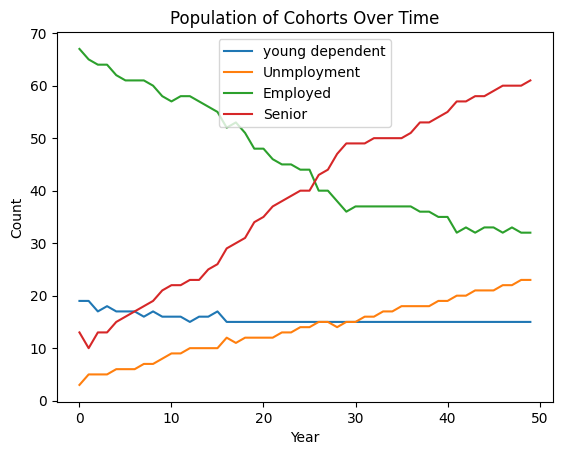

In [ ]:
# debug 0705, step 4: test death rate replacing death age
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

death_rate = 0.23014 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return self.age >= retirement_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year

    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death

    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))

print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])
years = list(range(simulation_years))
plt.plot(years, cohorts[0], label="young dependent")
plt.plot(years, cohorts[1], label="Unmployment")
plt.plot(years, cohorts[2], label="Employed")
plt.plot(years, cohorts[3], label="Senior")
plt.title("Population of Cohorts Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.savefig('aging vs workforce.png')
plt.show()

In [ ]:
'''
Assumption 1: only population 15 years and over reproduce
Birth rate in US as of 2021: 11.0 per 1,000 population
Data source: https://www.cdc.gov/nchs/fastats/births.htm

Assumption 2: death only happens after retired.
In 2021, life expectancy at birth was 76.4 years for the total U.S. population,
Data source: https://www.cdc.gov/nchs/products/databriefs/db456.\
htm#:~:text=Rates%20increased%2012.1%25%20for%2045,over%20(15%2C210.9%20to%2015%2C743.3).\
&text=Statistically%20significant%20increase%20from%202020%20to%202021%20(p%20%3C%200.05).,-NOTES%3A%20Rates%20are

so the annual death rate x satisfies
x + 2(1-x)x + 3(1-x)**2*x + ... + 76(1-x)**75*x = 76.4

or based on data source from https://en.wikipedia.org/\
wiki/Mortality_rate#:~:text=Mortality%20rate%20is%20typically%20expressed,0.95%25%20out%20of%20the%20total.

As of 2020, the CIA estimates the U.S. crude death rate will be 8.3 per 1,000

As of 2006, the monthly job finding rate takes 0.563
Data Source: https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr298.pdf

monthly job separation rate takes 0.47
* Data source: https://builtin.com/recruiting/employee-turnover-statistics#\
:~:text=1.,all%20turnover%20%E2%80%94%20voluntary%20and%20involuntary.

Assumption 3: all population aging from 15 to 64 are in labor force and
participation_rate = count 15-64 / total population

death rate for 65 years and over: (2151.3+5119.4+15743.3)/100000=0.23014
As per CDC 2021
Deaths per 100,000 population:
65-74: 2,151.3
75-84: 5,119.4
85 and over: 15,743.3
Data source: https://www.cdc.gov/nchs/fastats/older-american-health.htm
'''

2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 10, 13, 13, 15, 16, 17, 18, 19, 21, 22, 22, 23, 23, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 40, 40, 43, 44, 47, 49, 49, 49, 50, 50, 50, 50, 51, 53, 53, 54, 55, 57, 57, 58, 58, 59, 60, 60, 60, 61]]


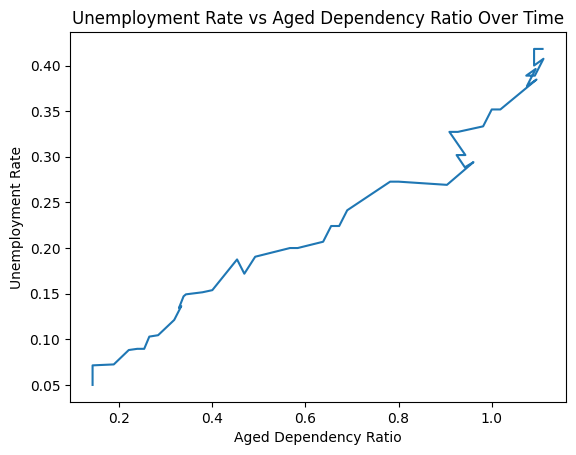

In [ ]:
# debug 0705, step 5: test unemp rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

#death_rate = 0.01
death_rate = 0.23014
# assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return self.age >= retirement_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []
unemp_rate_coh =[initial_unemployment_rate]
age_dep_ratio_coh = [initial_senior/initial_workforce]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year

    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death

    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))

    unemp_rate_coh.append(unemp_this_year/(unemp_this_year+emp_this_year))
    age_dep_ratio_coh.append(senior_this_year/(unemp_this_year+emp_this_year))

print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])
years = list(range(simulation_years))
plt.plot(age_dep_ratio_coh, unemp_rate_coh)
#plt.plot(years, age_dep_ratio_coh, label="Aged Dependency Ratio")

plt.title("Unemployment Rate vs Aged Dependency Ratio Over Time")
plt.xlabel("Aged Dependency Ratio")
plt.ylabel("Unemployment Rate")
#plt.legend()
plt.savefig('aging vs unemp.png')
plt.show()

In [ ]:
# debug 0705, step 6: test unemp rate with goods market
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce

#death_rate = 0.01
death_rate = 0.23 # assume death only happens after retired with count_death = count_senior * death_rate
#death_age = 80 #a simple alternative way for the senior is to assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed

    def update_age(self):
        self.age += 1

    def is_newborn(self):
        return self.age == 0

    def is_young(self):
        return self.age < 15

    def is_workforce(self):
        return 14 < self.age < retirement_age

    def is_senior(self):
        return self.age >= retirement_age

    def is_unemployed(self):
        return not self.employed

    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []
unemp_rate_coh =[initial_unemployment_rate]
age_dep_ratio_coh = [initial_senior/initial_workforce]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1

    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):

    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))

    for person in pop:
        #print(person.age, person.employed)

        if person.is_young():
            young_this_year += 1

        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1

            if person.is_employed():
                emp_this_year += 1

        if person.is_senior():
                senior_this_year += 1

        person.update_age()

    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)

    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year

    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death

    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))

    unemp_rate_coh.append(unemp_this_year/(unemp_this_year+emp_this_year))
    age_dep_ratio_coh.append(senior_this_year/(unemp_this_year+emp_this_year))

print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])



50